In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import algo
import utils
import interactions
import dicke

In [2]:
def ising_mag(J0s, wz, alpha, gs, beta, N, M):
    return np.abs(np.array([algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)[0] for J0 in J0s]))

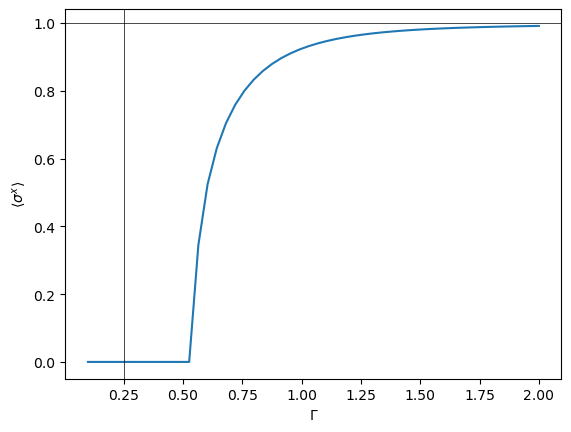

In [4]:
N = 70
M = int(np.sqrt(N) * np.log(N))
beta = 1
wz = 1
J0s = np.linspace(0.1, 2.0, 50)
alpha = 1.5

gs = 0.00 * np.ones(N)

J = interactions.powerlaw_pbc(N, alpha)
J = interactions.shift(J, 0.0)

mags = []
for J0 in J0s:
    J = J0 * interactions.rescale(J)
    ws, lams = utils.dicke_from_ising(J, 1e-6)
    #print(ws[-1] * J0)
    #print(np.sqrt(N) * lams[:, 0])
    #plt.imshow(lams)
    #plt.show()
    #ws, lams = utils.truncate_dicke(ws, lams, M)
    mags.append(dicke.mag_longitudinal_hessian_debug(beta, wz, ws, np.sqrt(N) * lams, gs, N)[0])
mags = np.abs(np.array(mags))

plt.plot(J0s, mags)
plt.axvline(0.25, c='k', lw=0.5)
plt.axhline(1.00, c='k', lw=0.5)
plt.xlabel(r'$\Gamma$')
plt.ylabel(r'$\langle \sigma^x \rangle$')
plt.show()

Rounds to go: 2, current critical point:  0.6241379310344827 ...
Rounds to go: 1, current critical point:  0.659080459770115 ...


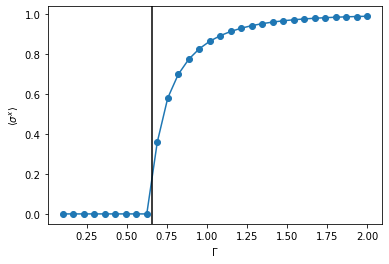

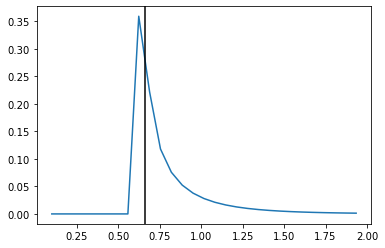

In [4]:
marker_kwargs = {'c': 'k',
                 'lw': 0,
                 'marker': 'o',
                 'fillstyle': 'none',
                 'markevery': 3,
                 'markersize': 10,
                 'markeredgewidth': 1.5,
                }

N = 70
M = int(np.sqrt(N) * np.log(N))
beta = 1 / 1.25
wz = 1
J0s = np.linspace(0.1, 2, 30)
alpha = 0.5

gs = 0.0 * np.ones(N)

plt.plot(J0s, ising_mag(J0s, wz, alpha, gs, beta, N, M), marker='o')
plt.xlabel(r'$\Gamma$')
plt.ylabel(r'$\langle \sigma^x \rangle$')

critical_J0 = utils.critical_point_recursive_refinement(ising_mag, J0s, [wz, alpha, gs, beta, N, M], rounds=3, verbose=True)
plt.axvline(critical_J0, c='k')

plt.show()

op = ising_mag(J0s, wz, alpha, gs, beta, N, M)
rel_diff = (op[1:] - op[:-1])

plt.plot(J0s[:-1], rel_diff)
plt.axvline(critical_J0, c='k')
plt.show()

$\alpha_\chi =$  0.0007568517931777361
[7.56851793e-04 7.15011952e+00]


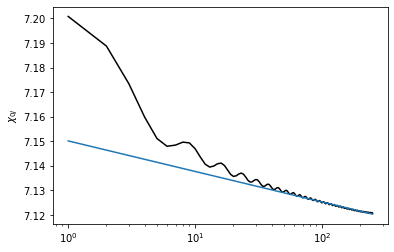

In [82]:
def correlation_length_fit(r, l, A):
    return A * r**(-l) 

N = 500
M = int(np.sqrt(N) * np.log(N))
beta = 1 / 0.05
wz = 1
J0 = 0.25
alpha = 0.7

gs = 0.0 * np.ones(N)
dg = 5e-3 * wz

i = 0
   
gs = 0.0 * np.ones(N)
mxs0 = algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)
gs[i] = dg
mxs1 = algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)
susc = ((mxs1 - mxs0) / dg)

rs = np.arange(1, N//2, 1)
fit_start = N//8
fit_rs = np.arange(fit_start, 4*N//8, 1)
plt.plot(rs, susc[1:N//2], c='k')
popt, pcov = curve_fit(correlation_length_fit, fit_rs, susc[fit_start:4*N//8], p0=[1, 1])
print(r'$\alpha_\chi =$ ', popt[0])
print(popt)
plt.plot(rs, correlation_length_fit(rs, *popt))

#ax.axvline(0.25, c='k', lw=0.5)
#plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\chi_{0j}$')
plt.show()

0.0008221515108215053 -1.189009267541963e-05


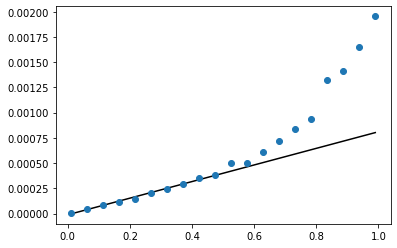

In [84]:
marker_kwargs = {'c': 'k',
                 'lw': 0,
                 'marker': 'o',
                 'fillstyle': 'none',
                 'markevery': 3,
                 'markersize': 10,
                 'markeredgewidth': 1.5,
                }

N = 500
M = int(np.sqrt(N) * np.log(N))
wz = 1
beta = 1 / 0.05
J0 = 0.25

gs = 0.0 * np.ones(N)
dg = 5e-3 * wz

i = 0

alphas = np.linspace(0.01, 0.99, 20)
crit_exp = []
for alpha in alphas:
    gs = 0.0 * np.ones(N)
    mxs0 = algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)
    gs[i] = dg
    mxs1 = algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)
    susc = ((mxs1 - mxs0) / dg)

    fit_start = N//8
    #rs = np.arange(1, N//2, 1)
    #ax.plot(rs, susc[1:N//2], c='k')
    popt, pcov = curve_fit(correlation_length_fit, np.arange(fit_start,4*N//8, 1), susc[fit_start:4*N//8], p0=[1, 1])
    crit_exp.append(popt[0])
    
    
def correlation_decay_fit(x, m, n):
    return x*m + n

popt, pcov = curve_fit(correlation_decay_fit, alphas[:2*len(alphas)//4], crit_exp[:2*len(alphas)//4], p0=(1, 0))
print(*popt)
plt.plot(alphas, correlation_decay_fit(alphas, *popt), c='k')
plt.plot(alphas, crit_exp, lw=0, marker='o')
plt.show()

In [60]:
0.670866014377453
0.6635922496836434
0.6648414045219964
0.66985033482133


0.66985033482133

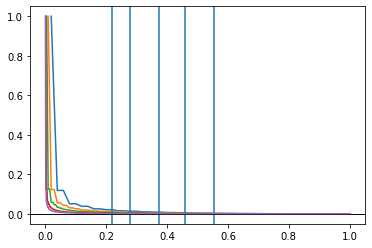

In [42]:
Ns = [50, 100, 200, 500, 1000]
alpha = 0.2

from scipy.linalg import eigh

for N in Ns:
    Jbase = interactions.powerlaw_pbc(N, alpha)
    Jbase = interactions.shift(Jbase, 0.)
    Jbase = interactions.rescale(Jbase)

    vals = eigh(Jbase, eigvals_only=True)
    plt.plot(np.arange(1, len(vals) + 1) / N, vals[::-1]) 
    plt.axvline(np.sqrt(N) * np.log(N) / N)
    plt.axhline(0, lw=0.5, c='k')
    
plt.show()

[0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.7071

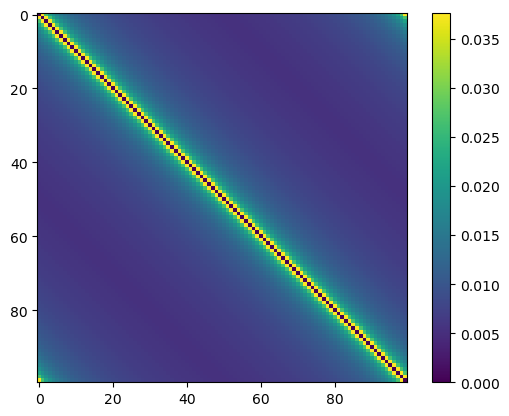

[1.41853122e+04 1.41853122e+04 1.41095518e+04 1.41095518e+04
 4.70559322e+03 4.70559322e+03 3.53499659e+03 3.53499659e+03
 2.00955962e+03 2.00955962e+03 1.56269938e+03 1.56269938e+03
 1.07534614e+03 1.07534614e+03 8.72375611e+02 8.72375611e+02
 6.59962117e+02 6.59962117e+02 5.52832336e+02 5.52832336e+02
 4.42159104e+02 4.42159104e+02 3.79229503e+02 3.79229503e+02
 3.14479572e+02 3.14479572e+02 2.74527111e+02 2.74527111e+02
 2.33435682e+02 2.33435682e+02 2.06544344e+02 2.06544344e+02
 1.78847948e+02 1.78847948e+02 1.59907122e+02 1.59907122e+02
 1.40351151e+02 1.40351151e+02 1.26517645e+02 1.26517645e+02
 1.12188548e+02 1.12188548e+02 1.01781186e+02 1.01781186e+02
 9.09588298e+01 9.09588298e+01 8.29329213e+01 8.29329213e+01
 7.45488571e+01 7.45488571e+01 6.82278885e+01 6.82278885e+01
 6.15899502e+01 6.15899502e+01 5.65202848e+01 5.65202848e+01
 5.11638084e+01 5.11638084e+01 4.70319926e+01 4.70319926e+01
 4.26352377e+01 4.26352377e+01 3.92188946e+01 3.92188946e+01
 3.55528002e+01 3.555280

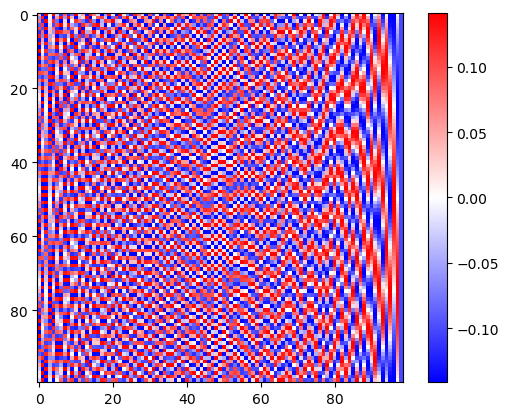



1.0


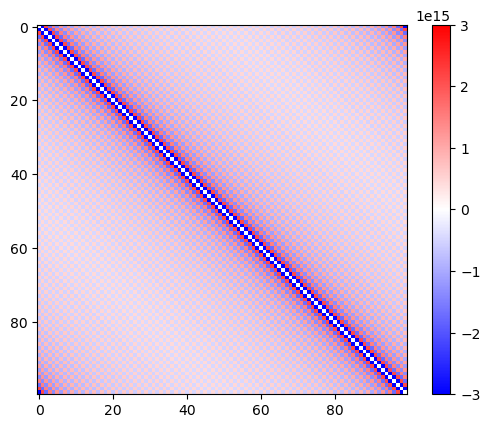

[-4.41744806e-01  1.77793638e-13  1.77793638e-13  1.76844085e-13
  1.76844085e-13  5.89782252e-14  5.89782252e-14  4.43063851e-14
  4.43063851e-14  2.51871027e-14  2.51871027e-14  1.95863161e-14
  1.95863161e-14  1.34780046e-14  1.34780046e-14  1.09340444e-14
  1.09340444e-14  8.27172953e-15  8.27172953e-15  6.92900311e-15
  6.92900311e-15  5.54186434e-15  5.54186434e-15  4.75312718e-15
  4.75312718e-15  3.94157467e-15  3.94157467e-15  3.44082479e-15
  3.44082479e-15  2.92579949e-15  2.92579949e-15  2.58875306e-15
  2.58875306e-15  2.24161632e-15  2.24161632e-15  2.00421878e-15
  2.00421878e-15  1.75911121e-15  1.75911121e-15  1.58572699e-15
  1.58572699e-15  1.40613120e-15  1.40613120e-15  1.27568905e-15
  1.27568905e-15  1.14004550e-15  1.14004550e-15  1.03945162e-15
  1.03945162e-15  9.34368757e-16  9.34368757e-16  8.55143993e-16
  8.55143993e-16  7.71946445e-16  7.71946445e-16  7.08405068e-16
  7.08405068e-16  6.41268906e-16  6.41268906e-16  5.89482202e-16
  5.89482202e-16  5.34374

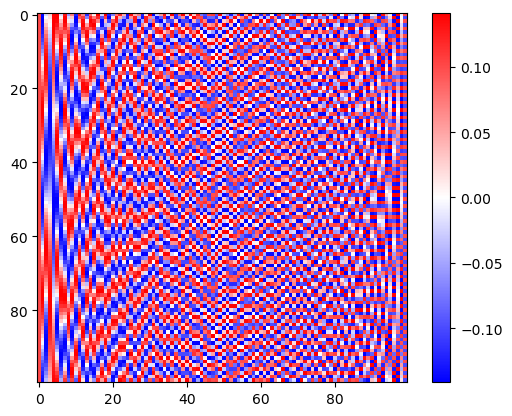

In [2]:
N = 100
M = int(np.sqrt(N) * np.log(N))
beta = 1
wz = 1
J0s = np.linspace(0.1, 2.0, 50)
alpha = 0.5

gs = 0.00 * np.ones(N)

J = interactions.powerlaw_pbc(N, alpha)
afmJ = np.zeros(J.shape)
for k in range(J.shape[0]):
    afmJ += np.diag((-1)**k * np.diag(J, k=k), k=k)
    afmJ += np.diag((-1)**k * np.diag(J, k=-k), k=-k)
print(np.diag(J, k=2))
print(np.diag(afmJ, k=2))
print(np.sum(J[1:, 0]))
print(np.sum(afmJ[1:, 0]))
J = interactions.shift(J, 0.0)
J = interactions.rescale(J)

plt.imshow(J - np.diag(np.diag(J)))
plt.colorbar()
plt.show()

ws, lams = utils.dicke_from_ising(J, 1e-6)
print(ws)
plt.imshow(lams, cmap='bwr')
plt.colorbar()
plt.show()

print()
print()

afmJ = interactions.shift(afmJ, 0.0)
print(np.sum(J[0, :]))
#afmJ = interactions.rescale(afmJ)
vmax = np.amax(np.abs(afmJ - np.diag(np.diag(afmJ))))
plt.imshow(afmJ - np.diag(np.diag(afmJ)), cmap='bwr', vmin=-vmax, vmax=vmax)
plt.colorbar()
plt.show()

ws, lams = utils.dicke_from_ising(afmJ, 1e-6)
print(ws)
plt.imshow(lams, cmap='bwr')
plt.colorbar()
plt.show()

print()
print()